In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT
%matplotlib inline
import os

In [2]:
dirpath ='/Users/abhinay/Documents/cs/projects/fantasy-hockey-analytics/standings-snapshot-analysis/data-files'
list_files = os.listdir(dirpath) # dir is your directory path
number_files = len(list_files)

In [3]:
datelist = pd.date_range("2017-10-17", periods=number_files-1).tolist()
dates = list((dobj.date().strftime('%Y-%m-%d') for dobj in datelist))
stats = pd.DataFrame()

In [4]:
for date in dates:
    path ='~/Documents/cs/projects/fantasy-hockey-analytics/standings-snapshot-analysis/data-files/{}.csv'.format(date)
    frame = pd.read_csv(path)
    # Renaming the columns for clarity
    frame.rename(columns={'GP*.1': 'GoalieGP', 'GP*': 'PlayerGP'}, inplace=True)
    frame['date'] = date
    stats = pd.concat([stats, frame], ignore_index=True)

In [5]:
PIM = pd.DataFrame()
for name in stats['Team Name'].unique():
    df = stats[stats['Team Name']== name][['date','PIM']]
    df.set_index(df['date'], inplace=True)
    df.drop('date', axis=1, inplace=True)
    df.rename(columns={'PIM':name}, inplace=True)
    PIM=pd.concat([PIM, df], axis=1)

PIM

,/u/BuffaloSobbers1,/u/xskilledsnipax,/u/Hotwired38,/u/canadaq,/u/crayfishparty2,/u/joey3140,/u/TheManagement,/u/Dangled0re,/u/xprmnts,/u/acegfx,/u/scomar201,/u/rjupp24,/u/flykessel,Huge's Real Gud Pros,/u/mcgrevin,/u/phoninghome,/u/Truxa,/u/idrisk2000,u/ctrl_alt_karma,/u/ninjaemperor
date,,,,,,,,,,,,,,,,,,,,
2017-10-17,45,46,62,59,24,39,47,61,49,20,45,56,36,78,68,44,52,28,55,50
2017-10-18,49,54,66,67,32,43,49,72,55,24,49,64,40,91,81,54,60,30,59,56
2017-10-19,49,54,74,69,34,45,49,74,55,24,53,68,44,93,81,58,60,30,59,56
2017-10-20,57,60,76,75,40,51,51,76,59,28,53,74,46,99,85,58,64,34,59,62


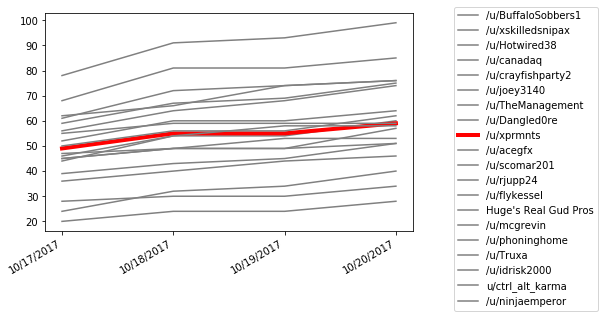

In [6]:
x = [DT.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
for name in PIM.columns:
    if name == '/u/xprmnts':
        plt.plot(x,PIM[name],'r-',lw=4,)
    else:
        plt.plot(x,PIM[name],'grey')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.gcf().autofmt_xdate()
plt.tight_layout()
